![](cover.png)

# 隨機森林 + Kaggle初參賽


## 目標

我們使用Kaggle的鐵達尼號資料集來教你一個重量級的演算法，隨機森林

隨機森林是一個非常方便的演算法，可以應用在很多現實生活的問題並且得到還不錯的結果

我們順便在資料科學的大本營(Kaggle)，參加我們第一個練習賽

當然，雖然只是學習一個簡單的演算法並且參加一個練習賽，我們還是希望能在這個比賽上面拿到一個不錯的名次

## 隨機森林

徹底地貫徹『三個臭皮匠，勝過一個諸葛亮』的概念，

我們蒐集很多不用到最佳的樹，讓他們用多數決來決定答案是哪個分類

但這裡有一點要特別強調

上面那句話是對的，但要加上一點特別的聲明，要是三個擁有不同經歷的臭皮匠

如果三個臭皮匠根本長得一模一樣，無論如何都不會勝過一個諸葛亮的

所以如果我們每個決策樹都長得一模一樣，我們的森林永遠建造不起來

那如何讓他不一樣呢？

很簡單，就每個決策樹在創建的時候不使用全部的訓練資料，只使用其中的一部份就好

這招我們叫bagging，在不使用全部資料的情況下，每個建造出來的樹自然就會不一樣

> 還有另外一種建造組合的方式叫作boosting, 我們剛剛的bagging是並行的建造很多樹，但boosting是把每一次的結果錯的地方修正
> boosting和bagging可以參考 https://www.jianshu.com/p/708dff71df3a

隨機森林雖然簡單，但在許多的分類問題都可以得到非常非常好的效果

## 資料集位置

<img src="tit.jpg">

https://www.kaggle.com/c/titanic/data

1. 需要登入才能下載
2. train.csv: 訓練的資料集
3. test.csv: 測試的資料集


## ✔ 資料處理

### Step 0. 讀入鐵達尼訓練集

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
%matplotlib inline

%matplotlib inline

# 為了顯示的漂亮, 我刻意的把印出來的row只顯示15個和column只顯示十個
# 大家練習的時候可以去掉下面兩行
pd.set_option('display.max_rows', 15)


In [2]:
df = pd.read_csv("train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q


In [3]:
df["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

### Step 1. 遺漏值的處理

在還沒建立模型，處理現實資料的時候，我們通常會端上的第一道處理是遺失值的處理

因為遺失值不可避免會對我們建立模型造成一定的影響

我們先檢查一下到底有哪些欄位是有缺失值，而且缺失幾個

如果缺失太多，我們會選擇直接放棄這個欄位

如果缺失只有少數，我們會在不影響資料整體的前提下，補上遺漏值

In [4]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
5,False,False,False,False,False,True,False,False,False,False,True,False
6,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
884,False,False,False,False,False,False,False,False,False,False,True,False
885,False,False,False,False,False,False,False,False,False,False,True,False


In [5]:
# sum會針對上面得到的結果加出一個答案
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### 1.1 連續數值的缺失處理

如果選擇補上的話

這裡在補上缺失值的時候，通常大家會有兩種不同的做法

做法1: 補上mean，平均值

做法2: 補上median，中位數值

我個人比較不喜歡補平均值，因為平均值會被極高或者極小值影響，所以我會補上中位數值

你可以直接對整個df使用df.fillna(數字)，就會幫你把所有數字型態的欄位直接補上那個數字

In [6]:
df = df.fillna(df.median())
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q


In [7]:
# 補完數字以後只剩Cabin(字串)和Embarked(字串)有遺漏值了
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### 1.2 類別(字串)數值的缺失處理

如果選擇補上的話，這裡的字串就會直接補上最常出現的字串

但是Cabin實在遺漏太多了 687/891，所以我直接選擇放棄這個欄位

In [8]:
df = df.drop(["Cabin"], axis = 1)

Embarked我選擇補上最常出現的值

In [9]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [10]:
print("Embarked最常出現:", df['Embarked'].value_counts().idxmax())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].value_counts().idxmax())
print("補完後的nan:")
print(df.isnull().sum())

Embarked最常出現: S
補完後的nan:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


### Step 2. 特徵的處理

在隨機森林的時候，數值特徵並不需要特別的處理，因為我們是選擇一個數，分成左右兩份，所以就算你把數做標準化(濃縮成0到1)也不會影響任何事物

但是在處理類別(字串)特徵的時候，我們通常會選擇一種處理方式叫做One-Hot Encoding(獨熱編碼)

為什麼要特別處理類別(字串)，因為事實上我們的scikit-learn和大多數的機器學習函式庫在處理特徵的時候，都只會把特徵值當成數值來處理

所以我們會把我們的字串轉成整數表示

這時候就有一個問題了，假設你的特徵值是 0(紅色)  1(藍色)   2(綠色)  

但其實紅藍綠根本沒有一個誰大誰小的順序 這就會造成問題了

這時候我們會選擇把這個欄位分成三個欄位

One-Hot Encoding例子

|id|顏色|
|---|---|
|0|紅|
|1|藍|
|2|綠|

|id|紅|藍|綠
|---|---|
|0|1|0|0
|1|0|1|0
|2|0|0|1

我們這裡使用get_dummies就會幫我們創造出one-hot encoding
之後再把它連接回去原本的df就好

In [11]:
# 創造出one-hot欄位
dummy = pd.get_dummies(df['Embarked'])
# concat是連結的意思, axis = 1指的是水平的連接
df = pd.concat([df, dummy], axis=1)
df = df.drop(["Embarked"], axis = 1)

dummy = pd.get_dummies(df['Sex'])
df = pd.concat([df, dummy], axis=1)
df = df.drop(["Sex"], axis = 1)

df

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,C,Q,S,female,male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,0,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,1,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0,0,1,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,0,0,1,1,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,0,0,1,0,1
5,6,0,3,"Moran, Mr. James",28.0,0,0,330877,8.4583,0,1,0,0,1
6,7,0,1,"McCarthy, Mr. Timothy J",54.0,0,0,17463,51.8625,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",25.0,0,0,SOTON/OQ 392076,7.0500,0,0,1,0,1
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",39.0,0,5,382652,29.1250,0,1,0,1,0


接下來處理名字，名字對我而言有用的東西是稱謂。

這裡就一定要畫個圖看一下到底每個稱謂出現了幾次

我畫完了以後發現Mr Mrs Miss是三個出現最多而且看起來真的有影響的稱謂，其餘都是一些稀少稱謂

所以我就只留Mr Mrs Miss，其餘直接丟掉

In [12]:
s = df['Name'].str.split(",", expand = True)[1]
s = s.str.split(" ", expand = True)[1]
# 這裡我要產生pdf的時候style會印製不出來, 所以我用最素的
# 讀者可以把下面的註解拿掉替換
# pd.crosstab(s, df['Survived']).T.style.background_gradient(cmap = "autumn")
pd.crosstab(s, df['Survived']).T

1,Capt.,Col.,Don.,Dr.,Jonkheer.,Lady.,Major.,Master.,Miss.,Mlle.,Mme.,Mr.,Mrs.,Ms.,Rev.,Sir.,the
Survived,,,,,,,,,,,,,,,,,
0,1,1,1,4,1,0,1,17,55,0,0,436,26,0,6,0,0
1,0,1,0,3,0,1,1,23,127,2,1,81,99,1,0,1,1


In [13]:
def name_filter(data):
    if data == 'Mr.':
        return 'Mr'
    elif data == 'Mrs.':
        return 'Mrs'
    elif data == 'Miss.':
        return 'Miss'
    else:
        return 'Unknown'
df['Name'] = s.apply(name_filter)

dummy = pd.get_dummies(df['Name'])
df = pd.concat([df, dummy], axis=1)
df = df.drop(["Name"], axis = 1)
df = df.drop(["Unknown"], axis = 1)

df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,C,Q,S,female,male,Miss,Mr,Mrs
0,1,0,3,22.0,1,0,A/5 21171,7.2500,0,0,1,0,1,0,1,0
1,2,1,1,38.0,1,0,PC 17599,71.2833,1,0,0,1,0,0,0,1
2,3,1,3,26.0,0,0,STON/O2. 3101282,7.9250,0,0,1,1,0,1,0,0
3,4,1,1,35.0,1,0,113803,53.1000,0,0,1,1,0,0,0,1
4,5,0,3,35.0,0,0,373450,8.0500,0,0,1,0,1,0,1,0
5,6,0,3,28.0,0,0,330877,8.4583,0,1,0,0,1,0,1,0
6,7,0,1,54.0,0,0,17463,51.8625,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,25.0,0,0,SOTON/OQ 392076,7.0500,0,0,1,0,1,0,1,0
885,886,0,3,39.0,0,5,382652,29.1250,0,1,0,1,0,0,0,1


Ticket的數字太多，而且沒有一個很直覺的規律，所以我先將其丟棄

PassengerId只是一個一直增加的數，也並不影響我們的結果，所以也先將其丟棄

In [14]:
df = df.drop(["Ticket"], axis = 1)
#df = df.drop(["Name"], axis = 1)
df = df.drop(["PassengerId"], axis = 1)


In [15]:
# 我們把我們擁有的資料集分成兩份, 一份測試, 一份訓練
from sklearn.model_selection import train_test_split
# 把資料分成兩部分(1. 訓練資料 2. 測試資料)
data_train, data_test, target_train, target_test = train_test_split(
                                                    df.drop(["Survived"], axis = 1), 
                                                    df['Survived'], 
                                                    test_size=0.1)

### Step 3. 初步感覺


畫個heatmap感覺一下什麼是比較重要的，基本你發現了，性別大概就是最重要的差別

在那個事件上，大部分男士都很紳士的讓女士先上救生艇了！

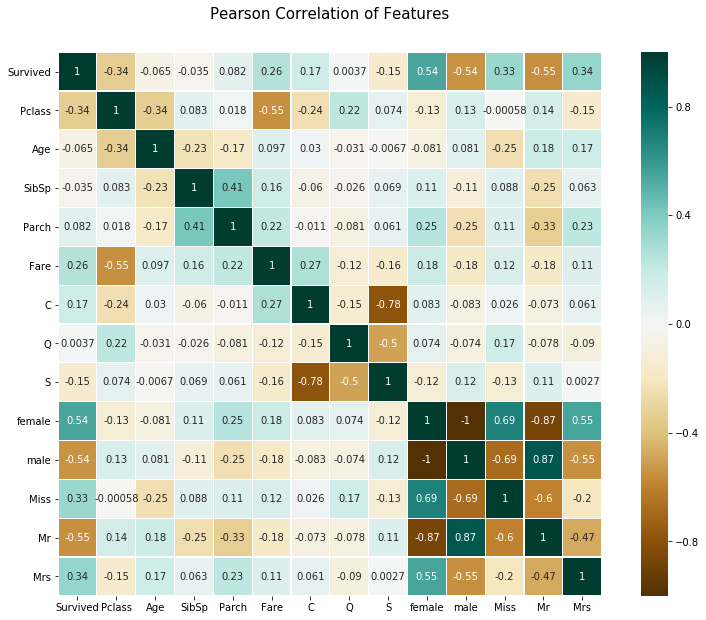

In [16]:
plt.figure(figsize=(14,10))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(df.astype(float).corr(), cmap = "BrBG", 
            linewidths=0.1, square=True, linecolor='white', 
            annot=True)

## ✔ 開始預測

### Step 1. 初步感覺

我們先使用之前說過的DecisionTreeClassifier看看一個分類樹會怎麼處理我們的問題

In [17]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth = 15, min_samples_leaf = 20)
clf = clf.fit(data_train, target_train)


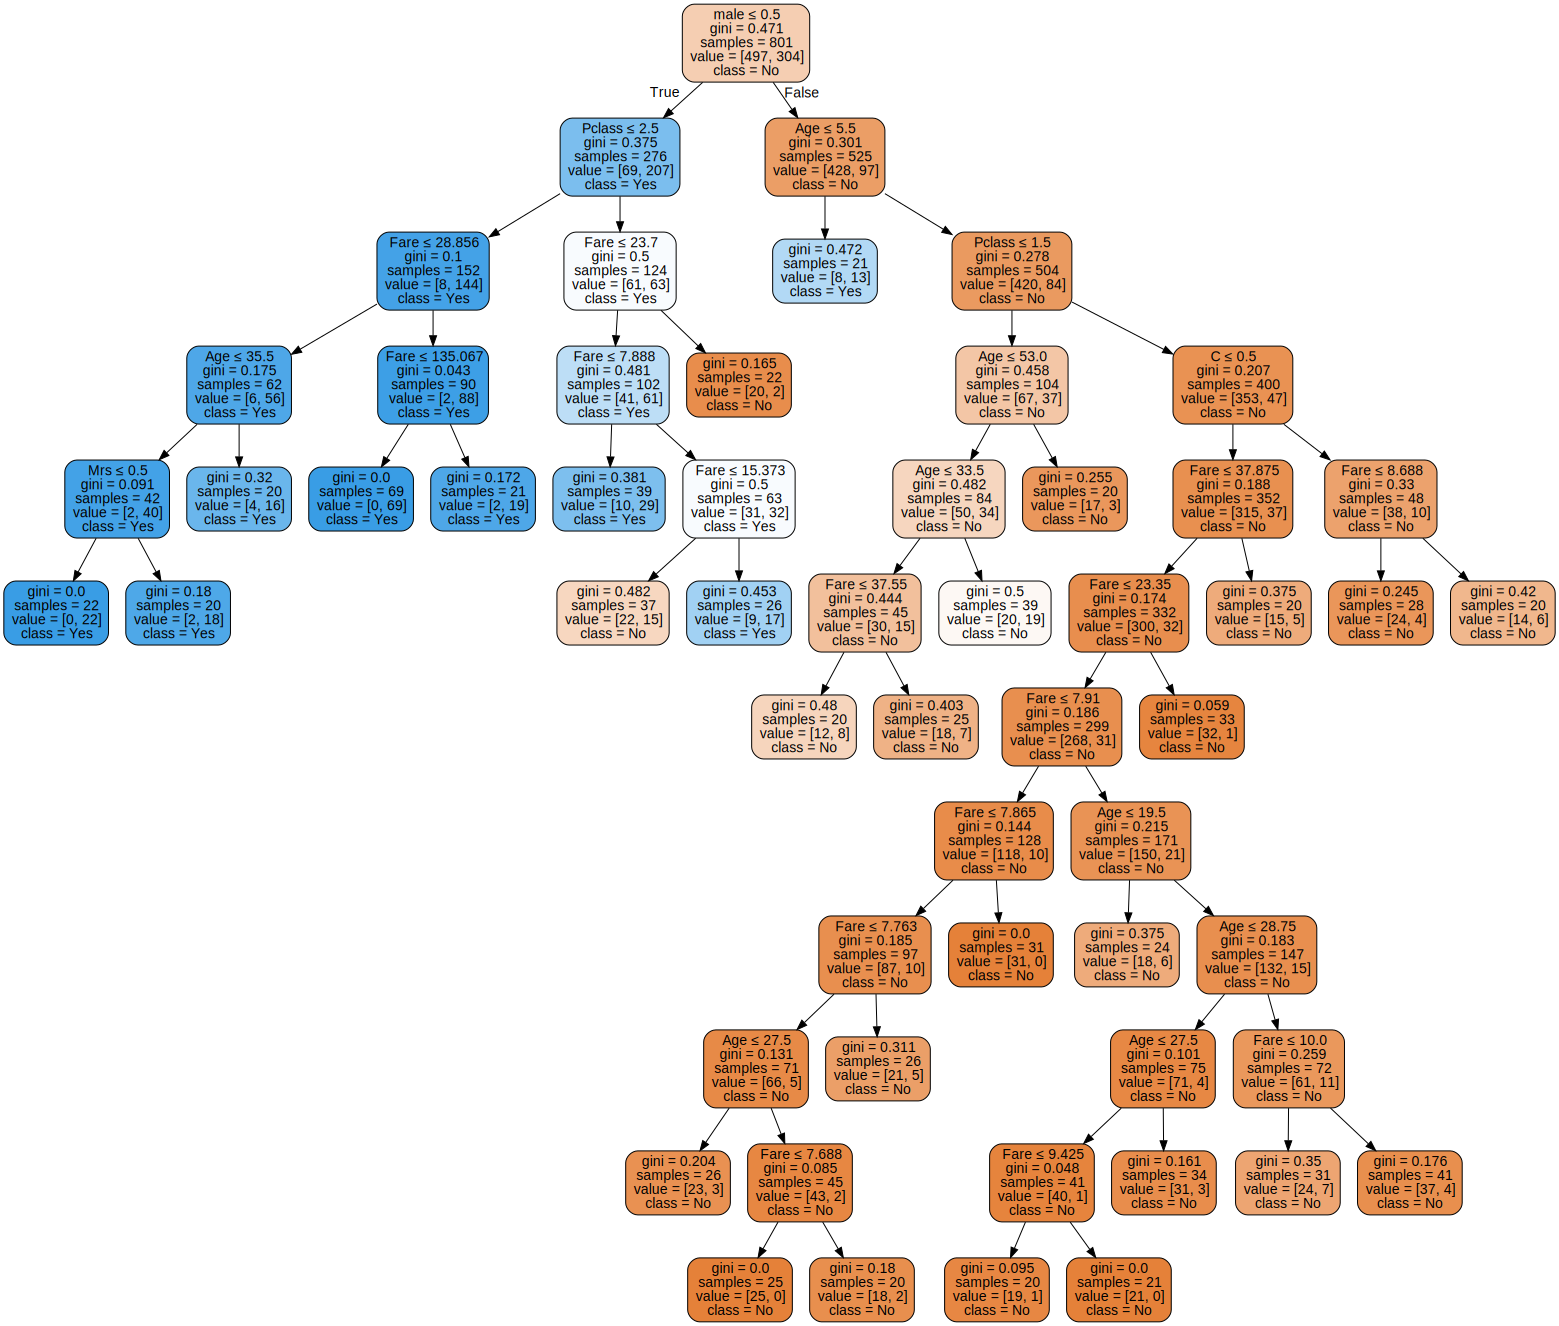

In [18]:
from sklearn.tree import export_graphviz
import graphviz
dot_data = export_graphviz(clf, out_file=None,
                         feature_names=df.drop(["Survived"], axis = 1).columns,
                         class_names=["No", "Yes"],
                         filled=True, rounded=True,
                         special_characters=True)
graph = graphviz.Source(dot_data)
# 這行可以輸出一個pdf, 讀者可以自行把註解拿掉試試看
# graph.render("iris2")
graph

In [19]:
from sklearn.metrics import accuracy_score

predict = clf.predict(data_test)
print("預測:", predict)
print("正確標籤:", list(target_test))
print("正確率: ", accuracy_score(target_test, predict) * 100, "%")



預測: [0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 1 0 0 1 1 1
 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0
 0 0 1 0 0 1 0 0 1 0 1 0 0 0 1 0]
正確標籤: [1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]
正確率:  80.0 %


### Step 2. 建立模型

開始使用隨機森林來建立模型，不過這次我們不使用隨機切割了

我們做一件事叫做交叉驗證

交叉驗證指的是每次把一部分的samples拿出來當訓練，另外一部分拿來當測試

最後算出每次驗證的平均

交叉驗證可以較好的表示我們模型的好壞

RandomForest的參數調整我們通常我們會調整

n_estimators: 要有幾顆樹，理論上越多越好，但是如果你的資料集沒有這麼大，產生太多樹反而沒那麼有意義，因為你會有很多同類型的臭皮匠

max_depth: 理論上不需要被調整，但我還是會建議調整一下，不要讓你每個臭皮匠過擬合

這裡經過我的調整我選擇26顆樹，每棵樹六層的深度

In [20]:
df

,Survived,Pclass,Age,SibSp,Parch,Fare,C,Q,S,female,male,Miss,Mr,Mrs
0,0,3,22.0,1,0,7.2500,0,0,1,0,1,0,1,0
1,1,1,38.0,1,0,71.2833,1,0,0,1,0,0,0,1
2,1,3,26.0,0,0,7.9250,0,0,1,1,0,1,0,0
3,1,1,35.0,1,0,53.1000,0,0,1,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,0,1,0,1,0,1,0
5,0,3,28.0,0,0,8.4583,0,1,0,0,1,0,1,0
6,0,1,54.0,0,0,51.8625,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,0,3,25.0,0,0,7.0500,0,0,1,0,1,0,1,0
885,0,3,39.0,0,5,29.1250,0,1,0,1,0,0,0,1


In [44]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scale = scaler.fit_transform(df.drop(["Survived"], axis=1))
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
pca = PCA(n_components=2)
result = pca.fit(x_scale)
result

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [45]:
pca.explained_variance_ratio_

array([0.47165434, 0.19227624])

In [46]:
result = pca.transform(df.drop(["Survived"], axis=1))
result

array([[-1.17886046,  0.19500761],
       [ 2.17265367,  4.71731766],
       [ 0.63035821,  0.11034946],
       ...,
       [ 1.07657296,  0.71952114],
       [-0.39043505,  2.99161735],
       [-1.26318665,  1.3750362 ]])

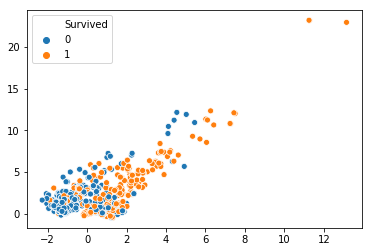

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(result[:, 0], result[:, 1], hue=df["Survived"])

In [ ]:
pca.components_

In [56]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
tsne.fit_transform(x_scale)

array([[ -4.840905 ,  18.848051 ],
       [-38.558674 ,   8.860769 ],
       [-14.859464 ,  -4.7558484],
       ...,
       [-14.809816 ,  -8.200274 ],
       [ 30.434929 ,  29.616476 ],
       [ 18.77004  , -46.18152  ]], dtype=float32)

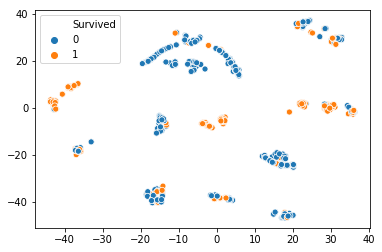

In [57]:
sns.scatterplot(tsne.embedding_[:, 0], tsne.embedding_[:, 1], hue=df["Survived"])

### Step 3. 正式預測

正式的預測我們的test.csv，並且把結果輸出並上傳

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# 6 or 7 is good
from xgboost import XGBClassifier
clf = XGBClassifier()
clf = clf.fit(df.drop(["Survived"], axis = 1), df['Survived'])
test_df = pd.read_csv("test.csv")

result_df = pd.DataFrame(columns = ["PassengerId", "Survived"])
result_df["PassengerId"] = test_df["PassengerId"]


test_df = test_df.fillna(df.median())
test_df = test_df.drop(["Cabin"], axis = 1)
test_df['Embarked'] = test_df['Embarked'].fillna("S")

dummy = pd.get_dummies(test_df['Embarked'])
test_df = pd.concat([test_df, dummy], axis=1)
test_df = test_df.drop(["Embarked"], axis = 1)
test_df = test_df.drop(["Ticket"], axis = 1)
test_df = test_df.drop(["PassengerId"], axis = 1)


dummy = pd.get_dummies(test_df['Sex'])
test_df = pd.concat([test_df, dummy], axis=1)
test_df = test_df.drop(["Sex"], axis = 1)


s = test_df['Name'].str.split(",", expand = True)[1]
s = s.str.split(" ", expand = True)[1]

test_df['Name'] = s.apply(name_filter)

dummy = pd.get_dummies(test_df['Name'])
test_df = pd.concat([test_df, dummy], axis=1)
test_df = test_df.drop(["Name"], axis = 1)
test_df = test_df.drop(["Unknown"], axis = 1)

test_df

In [ ]:
pre = clf.predict(test_df)


result_df["Survived"] = pre
result_df.to_csv("result_test.csv", index = False)

上傳你的第一個競賽的結果吧！！

你會發現我們的模型在沒看過的資料上面大概是 78% - 81%的正確率

排名在11000多個排名排名約700

已經表現得非常不錯了！！  

![](score.png)